<a href="https://colab.research.google.com/github/peterbmob/DHMVADoE/blob/main/Excercises/ANOVA_OLS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ANOVA and OLS

An alternate, and more general way, to perform an ANOVA  is to use multivariable regresssion. This will be demonstrated below.

Consider again the following example:

Researchers took 20 cars of the same to take part in a study. These cars are randomly doped with one of the four-engine oils and allowed to run freely for 100 kilometers each. At the end of the journey, the performance of each of the cars is noted.

Hypothesis involved: A one-way ANOVA has the below given null and alternative hypotheses:

- H0 (null hypothesis): μ$_1$ = μ$_2$ = μ$_3$ = … = μ$_k$ (It implies that the means of all the population are equal)

- H1 (null hypothesis): It states that there will be at least one population mean that differs from the rest


# Step 1: load the data

In [ ]:
import pandas as pd
# Performance when each of the engine
# oil is applied
p1 = [89, 89, 88, 78, 79]
p2 = [93, 92, 94, 89, 88]
p3 = [89, 88, 89, 93, 90]
p4 = [81, 78, 81, 92, 82]

df=pd.DataFrame({'oil_1':p1,'oil_2':p2,'oil_3':p3,'oil_4':p4})
df

,oil_1,oil_2,oil_3,oil_4
0,89,93,89,81
1,89,92,88,78
2,88,94,89,81
3,78,89,93,92
4,79,88,90,82


Manipulate the data so it can be used statmodels OLS function

In [ ]:
df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['oil_1', 'oil_2', 'oil_3', 'oil_4'])
# replace column names
df_melt.columns = ['index', 'Oil', 'value']
df_melt

,index,Oil,value
0,0,oil_1,89
1,1,oil_1,89
2,2,oil_1,88
3,3,oil_1,78
4,4,oil_1,79
5,0,oil_2,93
6,1,oil_2,92
7,2,oil_2,94
8,3,oil_2,89
9,4,oil_2,88


# Step 2: generate model and perform ANOVA analysis

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols


# Ordinary Least Squares (OLS) model
model = ols('value ~ C(Oil)', data=df_melt).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.464
Model:                            OLS   Adj. R-squared:                  0.364
Method:                 Least Squares   F-statistic:                     4.625
Date:                Thu, 11 Sep 2025   Prob (F-statistic):             0.0163
Time:                        19:33:39   Log-Likelihood:                -54.826
No. Observations:                  20   AIC:                             117.7
Df Residuals:                      16   BIC:                             121.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          84.6000      1.876     45.092      0.000      80.623      88.577
C(Oil)[T.oil_2]     6.6000      2.653      2.487      0.024       0.975      12.225
C(Oil)[T.oil_3]     5.2000      2.653      1.960      0.068      -0.425      10.825
C(Oil)[T.oil_4]    -1.8000      2.653     -0.678      0.507      -7.425       3.825
==============================================================================
Omnibus:                        1.084   Durbin-Watson:                   1.646
Prob(Omnibus):                  0.582   Jarque-Bera (JB):                0.510
Skew:                           0.391   Prob(JB):                        0.775
Kurtosis:                       2.975   Cond. No.                         4.79
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
anova_table = sm.stats.anova_lm(model, typ=1)
anova_table
# output (ANOVA F and p value)

,df,sum_sq,mean_sq,F,PR(>F)
C(Oil),3.0,244.2,81.4,4.625,0.016336
Residual,16.0,281.6,17.6,NaN,NaN


# Step 3: Interpret the results

Compare with the reults you obtained using scipy.stats.f_oneway. Is it he same?  

# Two-way ANOVA

Analysis of Variance and it is used to check whether there is a statistically significant difference between the mean value of three or more that has been divided into two factors. In simple words, ANOVA is a test conducted in statistics and it is used to interpret the difference between the mean value of at least three groups. The main objective of a two-way ANOVA is to find out how two factors affect a response variable and to find out whether there is a relation between the two factors on the response variable.

**Performing a Two-Way ANOVA in Python:**

Let us consider an example, researchers are curious to know if four different engine oils lead to different mileage of cars. In order to test this, they measured the mileage of 5 cars using four different engine oils. Since each car’s mileage is measured by applying each of the four-engine oils one by one so we can use ANOVA.

# Let's load the data

In [ ]:
# Import the library
import numpy as np
import pandas as pd

# Create the data
df = pd.DataFrame({'Cars': np.repeat([1, 2, 3, 4, 5], 4),
                          'Oil': np.tile([1, 2, 3, 4], 5),
                          'Mileage': [36, 38, 30, 29,
                                      34, 38, 30, 29,
                                      34, 28, 38, 32,
                                      38, 34, 20, 44,
                                      26, 28, 34, 50]})

# Print the dataframe
df

,Cars,Oil,Mileage
0,1,1,36
1,1,2,38
2,1,3,30
3,1,4,29
4,2,1,34
5,2,2,38
6,2,3,30
7,2,4,29
8,3,1,34
9,3,2,28


# Step 2: Look at the data

<Axes: ylabel='Density'>

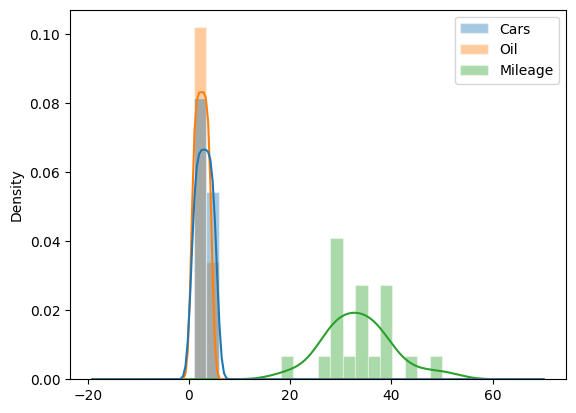

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df, bins=20, stat="density", kde=True, kde_kws=dict(cut=3), alpha=.4, edgecolor=(1, 1, 1, .4,))



# Step 2: train model and perform ANOVA

In [ ]:
# Importing libraries
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Performing two-way ANOVA
model = ols(
    'Mileage ~C(Cars) + C(Oil)', data=df).fit()
sm.stats.anova_lm(model, typ=1)

,df,sum_sq,mean_sq,F,PR(>F)
C(Cars),4.0,8.5,2.125000,0.035148,0.997291
C(Oil),3.0,103.0,34.333333,0.567884,0.646647
Residual,12.0,725.5,60.458333,NaN,NaN


In [ ]:
model.summary()

# Step 3: Interpreting the result
Since neither  p-value is less than 0.05, we cannot reject the null hypothesis and conclude that there is a not statistically significant difference in mean response times between the four-engine oils.

# Alternative way

In [ ]:
from statsmodels.stats.anova import AnovaRM

print(AnovaRM(data=df, depvar='Mileage',
              subject='Cars', within=['Oil']).fit())

              Anova
    F Value Num DF  Den DF Pr > F
---------------------------------
Oil  0.5679 3.0000 12.0000 0.6466



In [ ]:
from statsmodels.stats.anova import AnovaRM

print(AnovaRM(data=df, depvar='Mileage',
              subject='Oil', within=['Cars']).fit())

              Anova
     F Value Num DF  Den DF Pr > F
----------------------------------
Cars  0.0351 4.0000 12.0000 0.9973



# The ANOVA Controversy

ANOVA is a statistical process for analysing the amount of variance that is contributed to a sample by different factors. It was initially derived by R. A. Fisher in 1925, for the case of balanced data (equal numbers of observations for each level of a factor).

When data is unbalanced, there are different ways to calculate the **sums of squares** for ANOVA. There are at least 3 approaches, commonly called **Type I**, **II** and **III** sums of squares (this notation seems to have been introduced into the statistics world from the SAS package but is now widespread). Which type to use has led to an ongoing controversy in the field of statistics. However, it essentially comes down to testing different hypotheses about the data. --> Type I, II, and III Sums of Squares

Consider a model that includes two factors A and B; there are therefore two main effects, and an interaction, AB. The full model is represented by SS(A, B, AB).

Other models are represented similarly: SS(A, B) indicates the model with no interaction, SS(B, AB) indicates the model that does not account for effects from factor A, and so on.

The influence of particular factors (including interactions) can be tested by examining the differences between models. For example, to determine the presence of an interaction effect, an F-test of the models SS(A, B, AB) and the no-interaction model SS(A, B) would be carried out.

It is convenient to define incremental sums of squares to represent these differences. Let

SS(AB | A, B) = SS(A, B, AB) – SS(A, B)
SS(A | B, AB) = SS(A, B, AB) – SS(B, AB)
SS(B | A, AB) = SS(A, B, AB) – SS(A, AB)
SS(A | B) = SS(A, B) – SS(B)
SS(B | A) = SS(A, B) – SS(A)

The notation shows the incremental differences in sums of squares, for example SS(AB | A, B) represents “the sum of squares for interaction after the main effects”, and SS(A | B) is “the sum of squares for the A main effect after the B main effect and ignoring interactions” [1].

The different types of sums of squares then arise depending on the stage of model reduction at which they are carried out. In particular:

Type I, also called “sequential” sum of squares:

SS(A) for factor A.


SS(B | A) for factor B.


SS(AB | B, A) for interaction AB.


This tests the main effect of factor A, followed by the main effect of factor B after the main effect of A, followed by the interaction effect AB after the main effects.


Because of the sequential nature and the fact that the two main factors are tested in a particular order, this type of sums of squares will give different results for unbalanced data depending on which main effect is considered first.


For unbalanced data, this approach tests for a difference in the weighted marginal means. In practical terms, this means that the results are dependent on the realized sample sizes, namely the proportions in the particular data set. In other words, it is testing the first factor without controlling for the other factor (for further discussion and a worked example, see Zahn [4]).


Note that this is often not the hypothesis that is of interest when dealing with unbalanced data.
Type II:

SS(A | B) for factor A.


SS(B | A) for factor B.


This type tests for each main effect after the other main effect.


Note that no significant interaction is assumed (in other words, you should test for interaction first (SS(AB | A, B)) and only if AB is not significant, continue with the analysis for main effects).


If there is indeed no interaction, then type II is statistically more powerful than type III (see Langsrud [3] for further details).


Computationally, this is equivalent to running a type I analysis with different orders of the factors, and taking the appropriate output (the second, where one main effect is run after the other, in the example above).
Type III:

SS(A | B, AB) for factor A.


SS(B | A, AB) for factor B.


This type tests for the presence of a main effect after the other main effect and interaction. This approach is therefore valid in the presence of significant interactions.


However, it is often not interesting to interpret a main effect if interactions are present (generally speaking, if a significant interaction is present, the main effects should not be further analysed).


If the interactions are not significant, type II gives a more powerful test.
NOTE: when data is balanced, the factors are orthogonal, and types I, II and III all give the same results.
Summary: Usually the hypothesis of interest is about the significance of one factor while controlling for the level of the other factors. This equates to using type II or III SS. In general, if there is no significant interaction effect, then type II is more powerful, and follows the principle of marginality. If interaction is present, then type II is inappropriate while type III can still be used, but results need to be interpreted with caution (in the presence of interactions, main effects are rarely interpretable).

Source: https://www.r-bloggers.com/2011/03/anova-%e2%80%93-type-iiiiii-ss-explained/